In [1]:
import pickle

X_chair = pickle.load(open("X_chair.p","rb"))
Y_chair = pickle.load(open("Y_chair.p","rb"))
X_chair_median = pickle.load(open("X_median_chair.p","rb"))
Y_chair_median = pickle.load(open("Y_median_chair.p","rb"))
X_chair_mean = pickle.load(open("X_mean_chair.p","rb"))
Y_chair_mean = pickle.load(open("Y_mean_chair.p","rb"))

X_Neck = pickle.load(open("X_Neck.p","rb"))
Y_Neck = pickle.load(open("Y_Neck.p","rb"))
X_Neck_median = pickle.load(open("X_median_Neck.p","rb"))
Y_Neck_median = pickle.load(open("Y_median_Neck.p","rb"))
X_Neck_mean = pickle.load(open("X_mean_Neck.p","rb"))
Y_Neck_mean = pickle.load(open("Y_mean_Neck.p","rb"))


In [2]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [3]:
#Classifying all chair data with [Aravind, Isabella, Kim, Lobna, Thomas, Anand, Vasu]
import random

#Define Dataset
X = np.array(X_chair)
Y = np.array(Y_chair)

#Define parameters to optimize
tuned_parameters = [{'max_depth': [3,4,5,6,7,8,9,10,11,12,13], 'class_weight': ['balanced',None],
                     'presort':[True,False],'criterion': ['gini','entropy'], 'splitter':['random','best'],
                     'max_features':[1,2,3,4,5,6]}]

#Set the Classifier fit and tune parameters
dtc = tree.DecisionTreeClassifier()
clf = GridSearchCV(dtc,tuned_parameters)
clf.fit(X, Y)

BP = clf.best_params_

#K-fold cross validation with the optimized parameters
for k in range(20,21):
    clf1 = tree.DecisionTreeClassifier(class_weight=BP['class_weight'],
                                       criterion=BP['criterion'],
                                       max_depth=BP['max_depth'],
                                       max_features=BP['max_features'],
                                       presort=BP['presort'],
                                       splitter=BP['splitter'])
    kf = KFold(n_splits=k)
    sc = []
    for it in range(5):
        combined = list(zip(X, Y))
        random.shuffle(combined)

        X_shuffled, Y_shuffled = zip(*combined)
        X_shuffled = np.array(X_shuffled)
        Y_shuffled = np.array(Y_shuffled)
        kf_scores = [clf1.fit(X_shuffled[train], Y_shuffled[train]).score(X_shuffled[test], Y_shuffled[test]) for train, test in kf.split(X)]
        kf_scores_mean = np.mean(kf_scores)
        sc.append(kf_scores_mean)
    
    
#     print('K = '+str(k+2))
#     print('KF_scores_array')
#     print(kf_scores)
#     print('  ')
#     print('KF_scores_mean')
    print(np.mean(sc))
    print('  ')
    print('  ')

print(BP)
print(clf1.feature_importances_)

0.667442427653
  
  
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 5, 'presort': True, 'splitter': 'best'}
[ 0.01575355  0.00681084  0.033072    0.03012212  0.79244643  0.12179506]


[[423  16  43  71 184   0   0]
 [ 13 541  55  12  31   0   0]
 [ 16  29 105  33  23   0   0]
 [154   1  44 441  85   0   0]
 [ 40   4  31  32 145   0   0]
 [  0   0   0   0   0 305  10]
 [  0   0   0   0   0 303 944]]


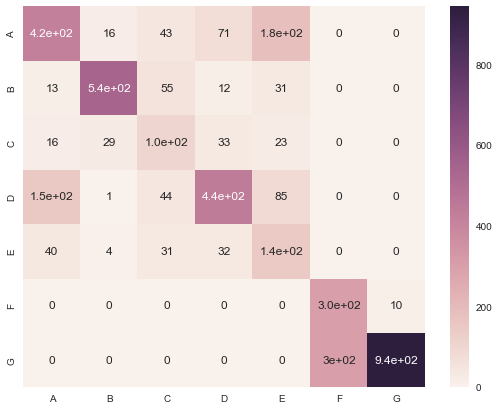

In [4]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(clf1.fit(X, Y).predict(X), Y)
print(cnf_matrix)

# Plot confusion matrix
import seaborn as sn
import pandas as pd

df_cm = pd.DataFrame(cnf_matrix, index = [i for i in "ABCDEFG"],
                  columns = [i for i in "ABCDEFG"])
plt.figure(figsize = (9,7))
sn.heatmap(df_cm, annot=True)
plt.show()

In [22]:
#Classifying mean chair data with [Aravind, Isabella, Kim, Lobna, Thomas, Anand, Vasu]

#Define Dataset
X = np.array(X_chair_mean)
Y = np.array(Y_chair_mean)

#Define parameters to optimize
tuned_parameters = [{'max_depth': [3,4,5,6,7,8,9,10,11,12,13], 'class_weight': ['balanced',None],
                     'presort':[True,False],'criterion': ['gini','entropy'], 'splitter':['random','best'],
                     'max_features':[1,2,3,4,5,6]}]

#Set the Classifier fit and tune parameters
dtc = tree.DecisionTreeClassifier()
clf = GridSearchCV(dtc,tuned_parameters)
clf.fit(X, Y)

BP = clf.best_params_

#K-fold cross validation with the optimized parameters
for k in range(20,21):
    clf1 = tree.DecisionTreeClassifier(class_weight=BP['class_weight'],
                                       criterion=BP['criterion'],
                                       max_depth=BP['max_depth'],
                                       max_features=BP['max_features'],
                                       presort=BP['presort'],
                                       splitter=BP['splitter'])
    kf = KFold(n_splits=k)
#     kf_scores = [clf1.fit(X[train], Y[train]).score(X[test], Y[test]) for train, test in kf.split(X)]
    sc = []
    for it in range(5):
        combined = list(zip(X, Y))
        random.shuffle(combined)

        X_shuffled, Y_shuffled = zip(*combined)
        X_shuffled = np.array(X_shuffled)
        Y_shuffled = np.array(Y_shuffled)
        kf_scores = [clf1.fit(X_shuffled[train], Y_shuffled[train]).score(X_shuffled[test], Y_shuffled[test]) for train, test in kf.split(X)]
        kf_scores_mean = np.mean(kf_scores)
        sc.append(kf_scores_mean)
    
    
#     print('K = '+str(k+2))
#     print('KF_scores_array')
#     print(kf_scores)
#     print('  ')
#     print('KF_scores_mean')
    print(np.mean(sc))
    print('  ')
    print('  ')

print(BP)
print(clf1.feature_importances_)

0.86
  
  
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 12, 'max_features': 4, 'presort': True, 'splitter': 'random'}
[ 0.30559647  0.04701323  0.12639667  0.20512821  0.13793103  0.17793439]


[[ 8  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0  6  0  0  0  0]
 [ 0  0  0  8  0  0  0]
 [ 0  0  0  0  7  0  0]
 [ 0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0 10]]


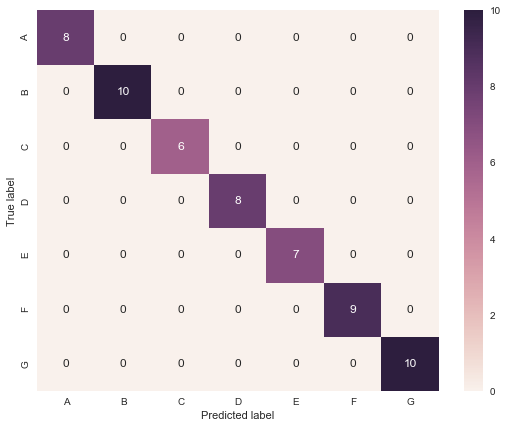

In [25]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(clf1.fit(X, Y).predict(X), Y)
print(cnf_matrix)

# Plot confusion matrix
df_cm = pd.DataFrame(cnf_matrix, index = [i for i in "ABCDEFG"],
                  columns = [i for i in "ABCDEFG"])
plt.figure(figsize = (9,7))
sn.heatmap(df_cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [7]:
#Classifying median chair data with [Aravind, Isabella, Kim, Lobna, Thomas, Anand, Vasu]

#Define Dataset
X = np.array(X_chair_median)
Y = np.array(Y_chair_median)

#Define parameters to optimize
tuned_parameters = [{'max_depth': [3,4,5,6,7,8,9,10,11,12,13], 'class_weight': ['balanced',None],
                     'presort':[True,False],'criterion': ['gini','entropy'], 'splitter':['random','best'],
                     'max_features':[1,2,3,4,5,6]}]

#Set the Classifier fit and tune parameters
dtc = tree.DecisionTreeClassifier()
clf = GridSearchCV(dtc,tuned_parameters)
clf.fit(X, Y)

BP = clf.best_params_

#K-fold cross validation with the optimized parameters
for k in range(20,21):
    clf1 = tree.DecisionTreeClassifier(class_weight=BP['class_weight'],
                                       criterion=BP['criterion'],
                                       max_depth=BP['max_depth'],
                                       max_features=BP['max_features'],
                                       presort=BP['presort'],
                                       splitter=BP['splitter'])
    kf = KFold(n_splits=k)
#     kf_scores = [clf1.fit(X[train], Y[train]).score(X[test], Y[test]) for train, test in kf.split(X)]
    sc = []
    for it in range(5):
        combined = list(zip(X, Y))
        random.shuffle(combined)

        X_shuffled, Y_shuffled = zip(*combined)
        X_shuffled = np.array(X_shuffled)
        Y_shuffled = np.array(Y_shuffled)
        kf_scores = [clf1.fit(X_shuffled[train], Y_shuffled[train]).score(X_shuffled[test], Y_shuffled[test]) for train, test in kf.split(X)]
        kf_scores_mean = np.mean(kf_scores)
        sc.append(kf_scores_mean)
    
    
#     print('K = '+str(k+2))
#     print('KF_scores_array')
#     print(kf_scores)
#     print('  ')
#     print('KF_scores_mean')
    print(np.mean(sc))
    print('  ')
    print('  ')

print(BP)
print(clf1.feature_importances_)

0.665
  
  
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 1, 'presort': True, 'splitter': 'best'}
[ 0.10169223  0.08835585  0.17265518  0.21935802  0.3900009   0.02793782]


[[ 8  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0  6  0  0  0  0]
 [ 0  0  0  8  0  0  0]
 [ 0  0  0  0  7  0  0]
 [ 0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0 10]]


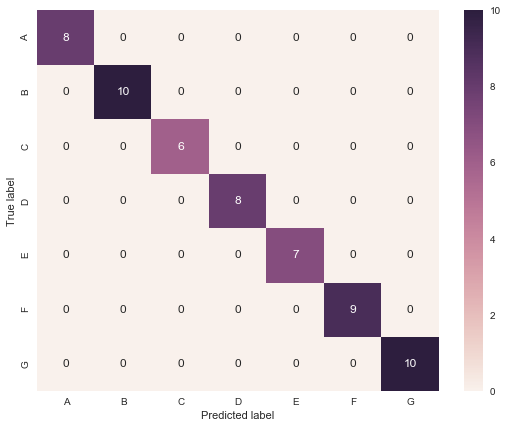

In [8]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(clf1.fit(X, Y).predict(X), Y)
print(cnf_matrix)

# Plot confusion matrix
df_cm = pd.DataFrame(cnf_matrix, index = [i for i in "ABCDEFG"],
                  columns = [i for i in "ABCDEFG"])
plt.figure(figsize = (9,7))
sn.heatmap(df_cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [9]:
#Classifying all Neck data with [Aravind, Isabella, Kim, Lobna, Thomas, Anand, Vasu]

#Define Dataset
X = np.array(X_Neck)
Y = np.array(Y_Neck)

#Define parameters to optimize
tuned_parameters = [{'max_depth': [3,4,5,6,7,8,9,10,11,12,13], 'class_weight': ['balanced',None],
                     'presort':[True,False],'criterion': ['gini','entropy'], 'splitter':['random','best'],
                     'max_features':[1,2,3,4,5,6]}]

#Set the Classifier fit and tune parameters
dtc = tree.DecisionTreeClassifier()
clf = GridSearchCV(dtc,tuned_parameters)
clf.fit(X, Y)

BP = clf.best_params_

#K-fold cross validation with the optimized parameters
for k in range(20,21):
    clf1 = tree.DecisionTreeClassifier(class_weight=BP['class_weight'],
                                       criterion=BP['criterion'],
                                       max_depth=BP['max_depth'],
                                       max_features=BP['max_features'],
                                       presort=BP['presort'],
                                       splitter=BP['splitter'])
    kf = KFold(n_splits=k)
#     kf_scores = [clf1.fit(X[train], Y[train]).score(X[test], Y[test]) for train, test in kf.split(X)]
    sc = []
    for it in range(5):
        combined = list(zip(X, Y))
        random.shuffle(combined)

        X_shuffled, Y_shuffled = zip(*combined)
        X_shuffled = np.array(X_shuffled)
        Y_shuffled = np.array(Y_shuffled)
        kf_scores = [clf1.fit(X_shuffled[train], Y_shuffled[train]).score(X_shuffled[test], Y_shuffled[test]) for train, test in kf.split(X)]
        kf_scores_mean = np.mean(kf_scores)
        sc.append(kf_scores_mean)
    
    
#     print('K = '+str(k+2))
#     print('KF_scores_array')
#     print(kf_scores)
#     print('  ')
#     print('KF_scores_mean')
    print(np.mean(sc))
    print('  ')
    print('  ')

print(BP)
print(clf1.feature_importances_)

0.749384236453
  
  
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 12, 'max_features': 6, 'presort': False, 'splitter': 'best'}
[ 0.11790666  0.13469864  0.10279425  0.1304112   0.04830313  0.06405046
  0.10261598  0.03153525  0.26768444]


[[113   0   0   0   0   0   0]
 [  0  88   0   0   0   0   1]
 [  0   0  93   0   0   0   0]
 [  0   0   0  43   0   0   0]
 [  0   0   0   0  21   0   0]
 [  0   0   0   0   0  85   0]
 [  0   0   0   0   0   0 126]]


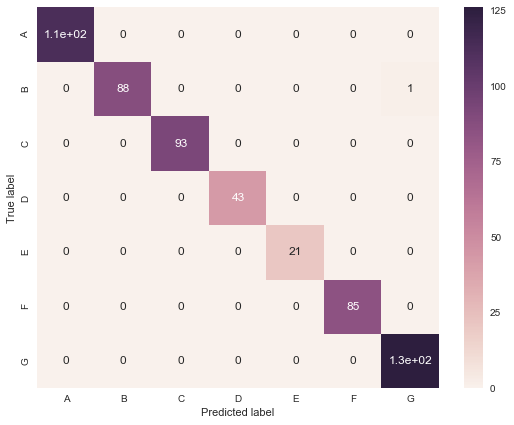

In [10]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(clf1.fit(X, Y).predict(X), Y)
print(cnf_matrix)

# Plot confusion matrix
df_cm = pd.DataFrame(cnf_matrix, index = [i for i in "ABCDEFG"],
                  columns = [i for i in "ABCDEFG"])
plt.figure(figsize = (9,7))
sn.heatmap(df_cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [11]:
#Classifying mean Neck data with [Aravind, Isabella, Kim, Lobna, Thomas, Anand, Vasu]

#Define Dataset
X = np.array(X_Neck_mean)
Y = np.array(Y_Neck_mean)

#Define parameters to optimize
tuned_parameters = [{'max_depth': [3,4,5,6,7,8,9,10,11,12,13], 'class_weight': ['balanced',None],
                     'presort':[True,False],'criterion': ['gini','entropy'], 'splitter':['random','best'],
                     'max_features':[1,2,3,4,5,6]}]

#Set the Classifier fit and tune parameters
dtc = tree.DecisionTreeClassifier()
clf = GridSearchCV(dtc,tuned_parameters)
clf.fit(X, Y)

BP = clf.best_params_

#K-fold cross validation with the optimized parameters
for k in range(20,21):
    clf1 = tree.DecisionTreeClassifier(class_weight=BP['class_weight'],
                                       criterion=BP['criterion'],
                                       max_depth=BP['max_depth'],
                                       max_features=BP['max_features'],
                                       presort=BP['presort'],
                                       splitter=BP['splitter'])
    kf = KFold(n_splits=k)
#     kf_scores = [clf1.fit(X[train], Y[train]).score(X[test], Y[test]) for train, test in kf.split(X)]

    sc = []
    for it in range(5):
        combined = list(zip(X, Y))
        random.shuffle(combined)

        X_shuffled, Y_shuffled = zip(*combined)
        X_shuffled = np.array(X_shuffled)
        Y_shuffled = np.array(Y_shuffled)
        kf_scores = [clf1.fit(X_shuffled[train], Y_shuffled[train]).score(X_shuffled[test], Y_shuffled[test]) for train, test in kf.split(X)]
        kf_scores_mean = np.mean(kf_scores)
        sc.append(kf_scores_mean)
    
    
#     print('K = '+str(k+2))
#     print('KF_scores_array')
#     print(kf_scores)
#     print('  ')
#     print('KF_scores_mean')
    print(np.mean(sc))
    print('  ')
    print('  ')

print(BP)
print(clf1.feature_importances_)

0.69
  
  
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'max_features': 6, 'presort': True, 'splitter': 'best'}
[ 0.36176471  0.16153846  0.          0.17307692  0.25833455  0.          0.
  0.          0.04528536]


[[ 6  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0]
 [ 0  0  9  0  0  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  1  0  0  0  7  0]
 [ 0  0  0  0  0  0 10]]


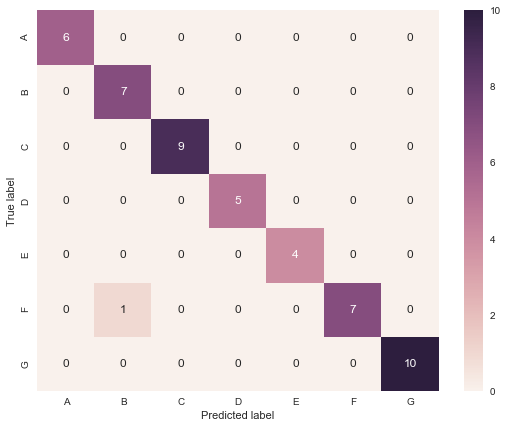

In [12]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(clf1.fit(X, Y).predict(X), Y)
print(cnf_matrix)

# Plot confusion matrix
df_cm = pd.DataFrame(cnf_matrix, index = [i for i in "ABCDEFG"],
                  columns = [i for i in "ABCDEFG"])
plt.figure(figsize = (9,7))
sn.heatmap(df_cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [13]:
#Classifying median Neck data with [Aravind, Isabella, Kim, Lobna, Thomas, Anand, Vasu]

#Define Dataset
X = np.array(X_Neck_median)
Y = np.array(Y_Neck_median)

#Define parameters to optimize
tuned_parameters = [{'max_depth': [3,4,5,6,7,8,9,10,11,12,13], 'class_weight': ['balanced',None],
                     'presort':[True,False],'criterion': ['gini','entropy'], 'splitter':['random','best'],
                     'max_features':[1,2,3,4,5,6]}]

#Set the Classifier fit and tune parameters
dtc = tree.DecisionTreeClassifier()
clf = GridSearchCV(dtc,tuned_parameters)
clf.fit(X, Y)

BP = clf.best_params_

#K-fold cross validation with the optimized parameters
for k in range(20,21):
    clf1 = tree.DecisionTreeClassifier(class_weight=BP['class_weight'],
                                       criterion=BP['criterion'],
                                       max_depth=BP['max_depth'],
                                       max_features=BP['max_features'],
                                       presort=BP['presort'],
                                       splitter=BP['splitter'])
    kf = KFold(n_splits=k)
#     kf_scores = [clf1.fit(X[train], Y[train]).score(X[test], Y[test]) for train, test in kf.split(X)]
    sc = []
    for it in range(5):
        combined = list(zip(X, Y))
        random.shuffle(combined)

        X_shuffled, Y_shuffled = zip(*combined)
        X_shuffled = np.array(X_shuffled)
        Y_shuffled = np.array(Y_shuffled)
        kf_scores = [clf1.fit(X_shuffled[train], Y_shuffled[train]).score(X_shuffled[test], Y_shuffled[test]) for train, test in kf.split(X)]
        kf_scores_mean = np.mean(kf_scores)
        sc.append(kf_scores_mean)
    
    
#     print('K = '+str(k+2))
#     print('KF_scores_array')
#     print(kf_scores)
#     print('  ')
#     print('KF_scores_mean')
    print(np.mean(sc))
    print('  ')
    print('  ')
print(BP)
print(clf1.feature_importances_)

0.671666666667
  
  
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'max_features': 5, 'presort': True, 'splitter': 'best'}
[ 0.05500414  0.22309318  0.10144928  0.26419743  0.05728587  0.2030303
  0.04647436  0.04946544  0.        ]


[[ 6  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0]
 [ 0  0  9  0  0  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0 10]]


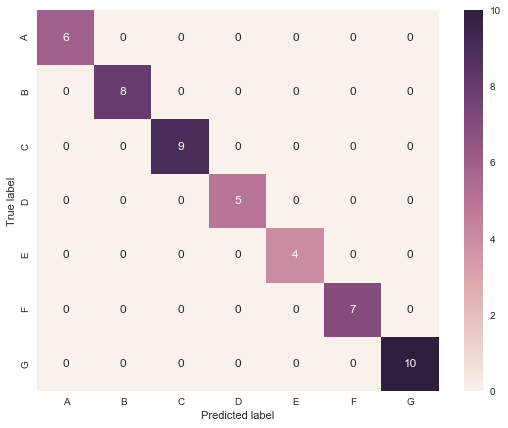

In [14]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(clf1.fit(X, Y).predict(X), Y)
print(cnf_matrix)

# Plot confusion matrix
df_cm = pd.DataFrame(cnf_matrix, index = [i for i in "ABCDEFG"],
                  columns = [i for i in "ABCDEFG"])
plt.figure(figsize = (9,7))
sn.heatmap(df_cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


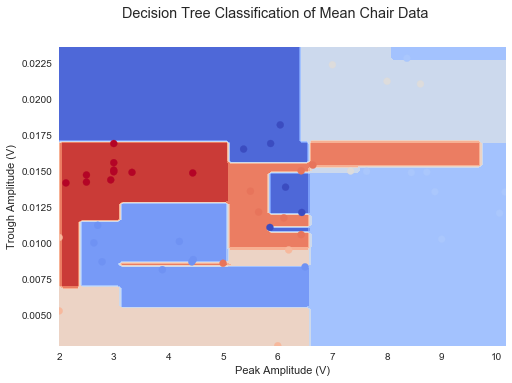

In [15]:
#Plotting mean chair data with [Aravind, Isabella, Kim, Lobna, Thomas, Anand, Vasu]

#Set up Prediction Model
#Set the feature values and the output values
Features_model = np.array(X_Neck_mean)
Y_model = np.array(Y_Neck_mean)

feature1 = 0
feature2 = 1
features = ['Peak Amplitude (V)','Trough Amplitude (V)', 'Peak to Peak Distance (Time)', 
            'Trough to Trough Distance (Time)', 'Peak to Trough Distance (Time)', 'Max FFT Value (Hz)']

X1 = Features_model[:,feature1]
X2 = Features_model[:,feature2]

#Optimizing Parameters
#Define Dataset
X = np.array(X_Neck_mean)
Y = np.array(Y_Neck_mean)

#Define parameters to optimize
tuned_parameters = [{'max_depth': [3,4,5,6,7,8,9,10,11,12,13], 'class_weight': ['balanced',None],
                     'presort':[True,False],'criterion': ['gini','entropy'], 'splitter':['random','best']}]
#                     'max_features':[1,2,3,4]}]

#Set the Classifier fit and tune parameters
dtc = tree.DecisionTreeClassifier()
clf = GridSearchCV(dtc,tuned_parameters)
clf.fit(X, Y)

BP = clf.best_params_

#Set Classifier and Fit the data
clf1 = tree.DecisionTreeClassifier(class_weight=BP['class_weight'],
                                   criterion=BP['criterion'],
                                   max_depth=BP['max_depth'],
#                                   max_features=BP['max_features'],
                                   presort=BP['presort'],
                                   splitter=BP['splitter'])
clf1.fit(np.c_[X1,X2],Y_model)


#Set up the steps in the grid mesh
plot_step_x1 = (max(X1)-min(X1))/100
plot_step_x2 = (max(X2)-min(X2))/100

# Let's pre-compute the range for our features
x1_min, x1_max = X1.min(), X1.max()
x2_min, x2_max = X2.min(), X2.max()

# And create a meshgrid so that we can create a countour plot on it
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, plot_step_x1),
                     np.arange(x2_min, x2_max, plot_step_x2))

# Now we predict the values for all of the cells in the meshgrid
Z = clf1.predict(np.c_[xx1.ravel(), xx2.ravel()]) # If you're curious what this is, read here: https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html and https://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html

# And we reshape those results to have the same shape as the mesh
Z = Z.reshape(xx1.shape)

# Now we can finally contour-plot, using a specific colormap
cs = plt.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm)

plt.xlabel(features[feature1])
plt.ylabel(features[feature2])
plt.axis("tight")

# Plot also the training points
plt.scatter(X1, X2, c=Y_model, cmap=plt.cm.coolwarm)

plt.suptitle("Decision Tree Classification of Mean Chair Data")
plt.show()


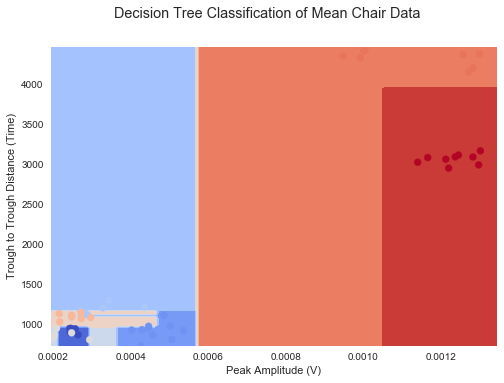

In [23]:
#Plotting mean chair data with [Aravind, Isabella, Kim, Lobna, Thomas, Anand, Vasu]

#Set up Prediction Model
#Set the feature values and the output values
Features_model = np.array(X_chair_mean)
Y_model = np.array(Y_chair_mean)

feature1 = 0
feature2 = 3
features = ['Peak Amplitude (V)','Trough Amplitude (V)', 'Peak to Peak Distance (Time)', 
            'Trough to Trough Distance (Time)', 'Peak to Trough Distance (Time)', 'Max FFT Value (Hz)']

X1 = Features_model[:,feature1]
X2 = Features_model[:,feature2]

#Optimizing Parameters
#Define Dataset
X = np.array(X_chair_mean)
Y = np.array(Y_chair_mean)

#Define parameters to optimize
tuned_parameters = [{'max_depth': [3,4,5,6,7,8,9,10,11,12,13], 'class_weight': ['balanced',None],
                     'presort':[True,False],'criterion': ['gini','entropy'], 'splitter':['random','best']}]
#                     'max_features':[1,2,3,4]}]

#Set the Classifier fit and tune parameters
dtc = tree.DecisionTreeClassifier()
clf = GridSearchCV(dtc,tuned_parameters)
clf.fit(X, Y)

BP = clf.best_params_

#Set Classifier and Fit the data
clf1 = tree.DecisionTreeClassifier(class_weight=BP['class_weight'],
                                   criterion=BP['criterion'],
                                   max_depth=BP['max_depth'],
#                                   max_features=BP['max_features'],
                                   presort=BP['presort'],
                                   splitter=BP['splitter'])
clf1.fit(np.c_[X1,X2],Y_model)


#Set up the steps in the grid mesh
plot_step_x1 = (max(X1)-min(X1))/100
plot_step_x2 = (max(X2)-min(X2))/100

# Let's pre-compute the range for our features
x1_min, x1_max = X1.min(), X1.max()
x2_min, x2_max = X2.min(), X2.max()

# And create a meshgrid so that we can create a countour plot on it
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, plot_step_x1),
                     np.arange(x2_min, x2_max, plot_step_x2))

# Now we predict the values for all of the cells in the meshgrid
Z = clf1.predict(np.c_[xx1.ravel(), xx2.ravel()]) # If you're curious what this is, read here: https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html and https://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html

# And we reshape those results to have the same shape as the mesh
Z = Z.reshape(xx1.shape)

# Now we can finally contour-plot, using a specific colormap
cs = plt.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm)

plt.xlabel(features[feature1])
plt.ylabel(features[feature2])
plt.axis("tight")

# Plot also the training points
plt.scatter(X1, X2, c=Y_model, cmap=plt.cm.coolwarm)

plt.suptitle("Decision Tree Classification of Mean Chair Data")
plt.show()
